#Görev-10:
iris veri seti ile;

lojistik regresyon algoritması ile sınıflandırma modeli geliştiriniz ve modelin başarısını değerlendiriniz.

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler




iris = load_iris() # scikit-learn kütüphanesinden direkt alıyoruz
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names # Veri setindeki bilgileri kullanarak sütun isimlendirme
# sepal (çanak yaprak) ve petal (taç yaprak) ve çiçeklerin uzunluk ve genişlikleri
df.columns=['Çanak Yaprak Uzunluğu (cm)', 'Çanak Yaprak Genişliği (cm)','Taç Yaprak Uzunluğu (cm)','Taç Yaprak Genişliği (cm)']


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Çanak Yaprak Uzunluğu (cm)   150 non-null    float64
 1   Çanak Yaprak Genişliği (cm)  150 non-null    float64
 2   Taç Yaprak Uzunluğu (cm)     150 non-null    float64
 3   Taç Yaprak Genişliği (cm)    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [93]:
# Hedef değişkeninin yüklenmesi
df['Tür'] = iris.target

# Tür kolunundaki numaralara, tür isimlerini verme
df['Tür'] = df['Tür'].replace({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
df.head(80)

,Çanak Yaprak Uzunluğu (cm),Çanak Yaprak Genişliği (cm),Taç Yaprak Uzunluğu (cm),Taç Yaprak Genişliği (cm),Tür
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,Versicolor
76,6.8,2.8,4.8,1.4,Versicolor
77,6.7,3.0,5.0,1.7,Versicolor
78,6.0,2.9,4.5,1.5,Versicolor


In [94]:
# Veri incelemesi
print(df.info())  # Veri türlerini kontrol et
print(df.describe().T)  # Temel istatistikler
print(df['Tür'].value_counts())  # Türlerin dağılımını kontrol et

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Çanak Yaprak Uzunluğu (cm)   150 non-null    float64
 1   Çanak Yaprak Genişliği (cm)  150 non-null    float64
 2   Taç Yaprak Uzunluğu (cm)     150 non-null    float64
 3   Taç Yaprak Genişliği (cm)    150 non-null    float64
 4   Tür                          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
                             count      mean       std  min  25%   50%  75%  \
Çanak Yaprak Uzunluğu (cm)   150.0  5.843333  0.828066  4.3  5.1  5.80  6.4   
Çanak Yaprak Genişliği (cm)  150.0  3.057333  0.435866  2.0  2.8  3.00  3.3   
Taç Yaprak Uzunluğu (cm)     150.0  3.758000  1.765298  1.0  1.6  4.35  5.1   
Taç Yaprak Genişliği (cm)    150.0  1.199333  0.762238  0.1  0.3  1.30  1.8   

                             max  
Ça

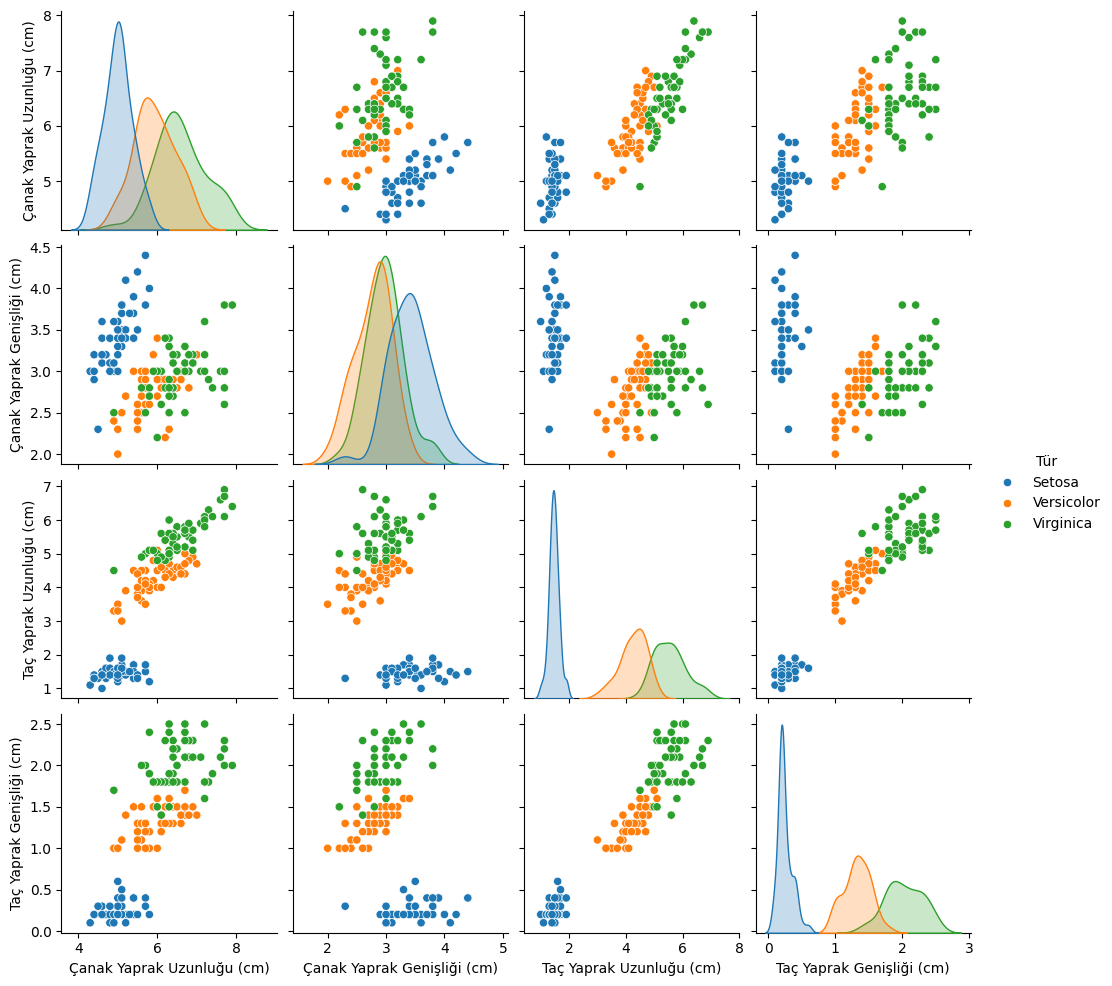

In [95]:
# Veri kümesini görselleştirme (her bir özelliğe göre dağılımı ve sınıflar arasındaki ilişkileri gösterme)

sns.pairplot(df,hue='Tür', diag_kind='kde')
plt.show()

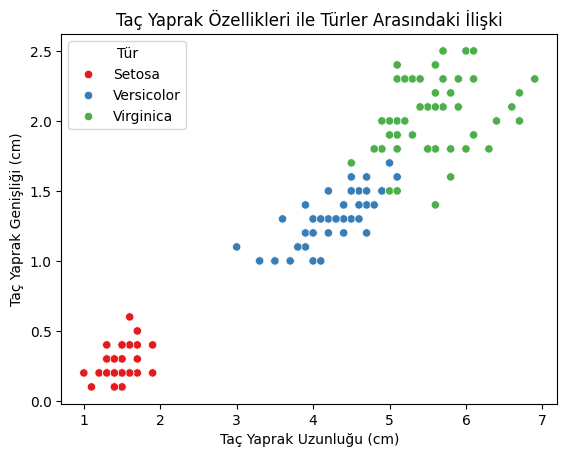

In [96]:
# Türlere göre taç yaprak uzunluk ve genişliğin görselleştirilmesi
sns.scatterplot(x=df['Taç Yaprak Uzunluğu (cm)'], y=df['Taç Yaprak Genişliği (cm)'], hue=df['Tür'], palette='Set1')
plt.title('Taç Yaprak Özellikleri ile Türler Arasındaki İlişki')
plt.show()

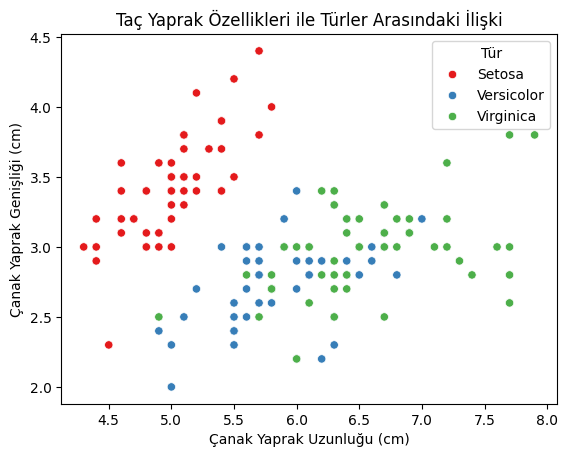

In [97]:
# Yukarının çanak yaprak hali (Pek anlamlı görünmüyor burası)
sns.scatterplot(x=df['Çanak Yaprak Uzunluğu (cm)'], y=df['Çanak Yaprak Genişliği (cm)'], hue=df['Tür'], palette='Set1')
plt.title('Taç Yaprak Özellikleri ile Türler Arasındaki İlişki')
plt.show()

In [98]:
# Veri Setini Eğitim ve Test Olarak (Bağımsız ve bağımlı değişkenleri) ayırma

# Bağımsız değişkenler (X)
X = df.drop('Tür', axis=1)

# Bağımlı değişken (y)
y = df['Tür']

# Eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
# Standartlaştırma
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [100]:
# Lojistik Regresyon Modelini Eğitme
# Modeli oluştur ve eğit
log_model = LogisticRegression()  # Maksimum iterasyon artırılarak modelin daha iyi öğrenmesi sağlanır
log_model.fit(scaled_X_train, y_train)  # Modeli eğit

# Test seti üzerinde tahmin yap
y_pred = log_model.predict(scaled_X_test)

In [101]:
accuracy_score(y_test, y_pred)

1.0

In [102]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [103]:
# Model Performansını Değerlendirme
# Başarı metrikleri
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))  # Doğruluk oranını hesapla
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))  # Precision, Recall, F1-Score

Doğruluk Oranı (Accuracy): 1.0

Sınıflandırma Raporu:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



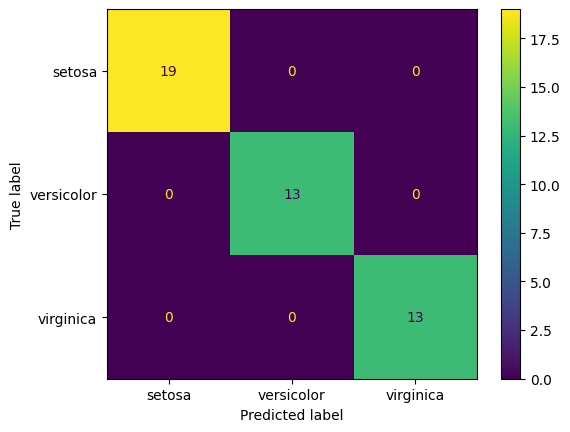

In [104]:
# Karmaşıklık Matrisi ile Değerlendirme
# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)  # Karmaşıklık matrisini oluştur
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)  # Matrisi görselleştir
disp.plot()
plt.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [106]:
single_sample = X_test.iloc[5]
single_sample

,31
Çanak Yaprak Uzunluğu (cm),5.4
Çanak Yaprak Genişliği (cm),3.4
Taç Yaprak Uzunluğu (cm),1.5
Taç Yaprak Genişliği (cm),0.4


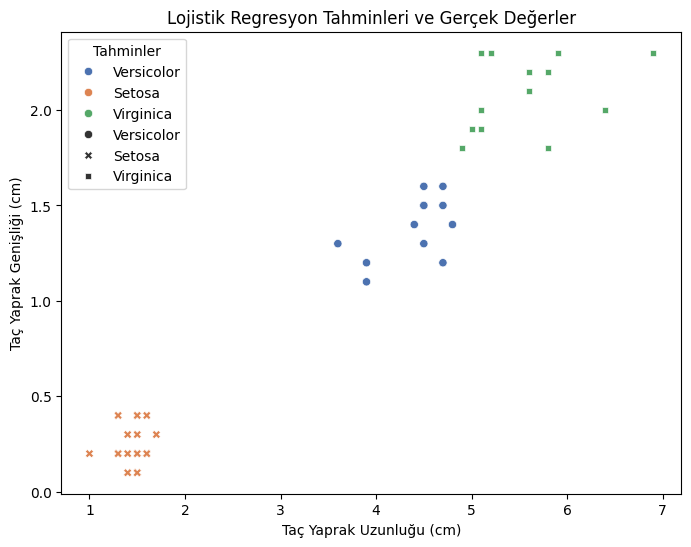

In [108]:
# Modelin Tahminleri ile Görselleştirme
# Gerçek değerler ve tahminlerin karşılaştırılması
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Taç Yaprak Uzunluğu (cm)'],
                y=X_test['Taç Yaprak Genişliği (cm)'],
                hue=y_pred,
                style=y_test,
                palette='deep')
plt.title("Lojistik Regresyon Tahminleri ve Gerçek Değerler")
plt.xlabel("Taç Yaprak Uzunluğu (cm)")
plt.ylabel("Taç Yaprak Genişliği (cm)")
plt.legend(title="Tahminler")
plt.show()